In [8]:
import logging
from datetime import datetime
from functools import reduce
from pathlib import Path
from pickle import FALSE

import numpy as np
import pandas as pd
from hnmchallenge.constant import *
from hnmchallenge.data_reader import DataReader
from hnmchallenge.datasets.last_month_last_week_dataset import LMLWDataset
from hnmchallenge.evaluation.python_evaluation import map_at_k, recall_at_k
from hnmchallenge.models_prediction.bought_items_recs import BoughtItemsRecs
from hnmchallenge.models_prediction.ease_recs import EaseRecs
from hnmchallenge.models_prediction.itemknn_recs import ItemKNNRecs
from hnmchallenge.models_prediction.popularity_recs import PopularityRecs
from hnmchallenge.models_prediction.recs_interface import RecsInterface
from hnmchallenge.models_prediction.time_pop import TimePop
from hnmchallenge.utils.logger import set_color
from matplotlib.pyplot import axis
from hnmchallenge.datasets.last_month_last_day import LMLDDataset
from hnmchallenge.models_prediction.ensemble_recs import EnsembleRecs

In [9]:
dataset = LMLDDataset()

In [10]:
holdin=dataset.get_holdin()
fd = dataset.get_full_data()
user_df = dataset.get_customers_df()
articles_df = dataset.get_articles_df()

In [42]:
models = [
        # "cutf_100_PSGE_tw_True_rs_False_k_256",
        # "cutf_100_Popularity_cutoff_100",
        "cutf_100_ItemKNN_tw_True_rs_False",
        "cutf_100_EASE_tw_True_rs_False_l2_0.001",
        # "cutf_40_Popularity_cutoff_40",
        # "cutf_0_BoughtItemsRecs",
    ]    

ensemble = EnsembleRecs(
    models_list=models,
    kind="full",
    dataset=dataset,
)

Creating ensemble with:
cutf_100_ItemKNN_tw_True_rs_False
cutf_100_EASE_tw_True_rs_False_l2_0.001




In [43]:
recs_ens = ensemble.get_recommendations()

loading recs model:
 cutf_100_ItemKNN_tw_True_rs_False
loading recs model:
 cutf_100_EASE_tw_True_rs_False_l2_0.001
ItemKNN_tw_True_rs_False_recs
EASE_tw_True_rs_False_l2_0.001_recs
['customer_id', 'ItemKNN_tw_True_rs_False_recs']
['customer_id', 'EASE_tw_True_rs_False_l2_0.001_recs']
dropping cols: ['ItemKNN_tw_True_rs_False_recs', 'EASE_tw_True_rs_False_l2_0.001_recs']
Average recs per user: 100.0


In [44]:
recs_ens["EASE_tw_True_rs_False_l2_0.001_score"].mean()

0.0018360674

In [33]:
recs_knn = RecsInterface.load_recommendations(dataset, "cutf_100_ItemKNN_tw_True_rs_False", kind="full")

loading recs model:
 cutf_100_ItemKNN_tw_True_rs_False


In [34]:
recs_knn[recs_knn[DEFAULT_USER_COL]==0][[DEFAULT_USER_COL, "ItemKNN_tw_True_rs_False_recs", "ItemKNN_tw_True_rs_False_rank"]]

,customer_id,ItemKNN_tw_True_rs_False_recs,ItemKNN_tw_True_rs_False_rank
0,0,1871,1.0
1,0,2067,2.0
2,0,2257,3.0
3,0,6262,4.0
4,0,2085,5.0
...,...,...,...
95,0,4922,96.0
96,0,458,97.0
97,0,3520,98.0
98,0,152,99.0


<AxesSubplot:>

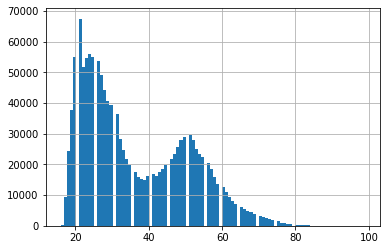

In [7]:
user_df["age"].hist(bins=100)

In [16]:
dataset.get_articles_df()["section_no"].nunique()

57

In [4]:
count=holdin.groupby([DEFAULT_ITEM_COL, DEFAULT_USER_COL]).count()

In [10]:
count[count["t_dat"]>1].reset_index().groupby(DEFAULT_ITEM_COL).size().to_frame().reset_index().rename(columns={0:self.FEATURE_NAME})

,article_id,0
0,0,464
1,1,257
2,2,133
3,3,296
4,4,1229
...,...,...
22575,25435,1
22576,25436,1
22577,25454,2
22578,25457,1


In [25]:
holdin.groupby(DEFAULT_ITEM_COL).filter((lambda x: x.t_dat != x.t_dat.max).all())

AttributeError: 'function' object has no attribute 'all'

In [39]:
holdin.sort_values("t_dat")

,t_dat,customer_id,article_id,price,sales_channel_id,last_buy
0,2018-09-20,0,0,0.008458,2,2020-08-31
4916,2018-09-20,2985,389,0.033881,2,2020-09-14
4915,2018-09-20,2984,746,0.025407,1,2020-09-06
4914,2018-09-20,2983,141,0.033881,2,2020-09-14
4913,2018-09-20,2982,525,0.013542,1,2020-09-08
...,...,...,...,...,...,...
15734172,2020-09-14,16413,2289,0.033881,2,2020-09-14
15734171,2020-09-14,16413,21602,0.033881,2,2020-09-14
15734170,2020-09-14,16413,22610,0.042356,2,2020-09-14
15734182,2020-09-14,24084,17296,0.006763,1,2020-09-14


In [38]:
holdin.groupby(DEFAULT_ITEM_COL)["price"].std().reset_index().rename(columns={"price":"avg_price"})

,article_id,avg_price
0,0,0.002222
1,1,0.003445
2,2,0.004583
3,3,0.003902
4,4,0.009937
...,...,...
25491,25491,NaN
25492,25492,NaN
25493,25493,NaN
25494,25494,NaN


In [27]:
last_date_item = holdin.groupby(DEFAULT_ITEM_COL)[["t_dat"]].max().reset_index()

In [29]:
last_date_item

,article_id,t_dat
0,0,2020-08-31
1,1,2020-09-13
2,2,2020-09-08
3,3,2020-07-19
4,4,2020-09-14
...,...,...
25491,25491,2020-09-14
25492,25492,2020-09-14
25493,25493,2020-09-14
25494,25494,2020-09-14


In [31]:
pd.merge(holdin, last_date_item, on=[DEFAULT_ITEM_COL, "t_dat"]).drop_duplicates(subset=DEFAULT_ITEM_COL)

,t_dat,customer_id,article_id,price,sales_channel_id,last_buy
0,2018-10-29,148442,1655,0.004237,1,2018-10-29
1,2018-12-01,233604,2144,0.003390,1,2018-12-01
2,2019-01-05,225936,1500,0.084729,2,2019-01-05
3,2019-01-22,334182,1114,0.030492,2,2019-01-22
4,2019-02-01,353398,1112,0.035576,1,2019-02-01
...,...,...,...,...,...,...
52245,2020-09-14,939812,14299,0.015237,2,2020-09-14
52246,2020-09-14,939812,21823,0.016932,2,2020-09-14
52247,2020-09-14,1159804,21164,0.218644,2,2020-09-14
52248,2020-09-14,453214,22035,0.016932,1,2020-09-14


In [23]:
holdin.groupby(DEFAULT_ITEM_COL)["price"].max()

article_id
0        0.008458
1        0.033881
2        0.025407
3        0.022017
4        0.050831
           ...   
25491    0.023322
25492    0.015508
25493    0.033881
25494    0.012610
25495    0.050831
Name: price, Length: 25496, dtype: float64

In [15]:
holdin["last_buy"] = holdin.groupby(DEFAULT_ITEM_COL)["t_dat"].transform("max")

In [18]:
holdin

,t_dat,customer_id,article_id,price,sales_channel_id,last_buy
0,2018-09-20,0,0,0.008458,2,2020-08-31
1,2018-09-20,0,0,0.008458,2,2020-08-31
2,2018-09-20,1,1,0.033881,1,2020-09-13
3,2018-09-20,2,2,0.021593,1,2020-09-08
4,2018-09-20,3,3,0.022017,2,2020-07-19
...,...,...,...,...,...,...
15754135,2020-09-14,453214,19246,0.025407,1,2020-09-14
15754136,2020-09-14,453214,141,0.033881,1,2020-09-14
15754137,2020-09-14,453214,17565,0.030492,1,2020-09-14
15754138,2020-09-14,453214,11189,0.016932,1,2020-09-14


In [16]:
holdin

,t_dat,customer_id,article_id,price,sales_channel_id,last_buy
0,2018-09-20,0,0,0.008458,2,2020-08-31
1,2018-09-20,0,0,0.008458,2,2020-08-31
2,2018-09-20,1,1,0.033881,1,2020-09-13
3,2018-09-20,2,2,0.021593,1,2020-09-08
4,2018-09-20,3,3,0.022017,2,2020-07-19
...,...,...,...,...,...,...
15754135,2020-09-14,453214,19246,0.025407,1,2020-09-14
15754136,2020-09-14,453214,141,0.033881,1,2020-09-14
15754137,2020-09-14,453214,17565,0.030492,1,2020-09-14
15754138,2020-09-14,453214,11189,0.016932,1,2020-09-14


In [8]:
data_df = holdin[["t_dat", DEFAULT_ITEM_COL, "price"]]
data_df

,t_dat,article_id,price
0,2018-09-20,0,0.008458
1,2018-09-20,0,0.008458
2,2018-09-20,1,0.033881
3,2018-09-20,2,0.021593
4,2018-09-20,3,0.022017
...,...,...,...
15754135,2020-09-14,19246,0.025407
15754136,2020-09-14,141,0.033881
15754137,2020-09-14,17565,0.030492
15754138,2020-09-14,11189,0.016932


In [11]:
data_df = fd[["t_dat", DEFAULT_ITEM_COL, "price"]]
data_df

,t_dat,article_id,price
0,2018-09-20,0,0.008458
1,2018-09-20,0,0.008458
2,2018-09-20,1,0.033881
3,2018-09-20,2,0.021593
4,2018-09-20,3,0.022017
...,...,...,...
16020499,2020-09-22,24439,0.059305
16020500,2020-09-22,19647,0.042356
16020501,2020-09-22,25890,0.043203
16020502,2020-09-22,6429,0.006763


In [ ]:
data_df = holdin[[DEFAULT_ITEM_COL, "price"]]
data_df = data_df.drop_duplicates([DEFAULT_ITEM_COL], keep="last").sort_values(
    DEFAULT_ITEM_COL
)

In [3]:
item_df = dataset.get_articles_df()
feature = item_df[[DEFAULT_ITEM_COL, "index_group_no"]]

In [4]:
feature["index_group_no"].nunique()

5

In [ ]:
models = ["cutf_10_ItemKNN_tw_True_rs_False", "cutf_10_ItemKNN_tw_False_rs_True"]

In [ ]:
recs_dfs_list = [RecsInterface.load_recommendations(dataset, m, kind="train") for m in models]    

In [ ]:
recs_dfs_list[0].columns

In [ ]:
recs_dfs_list[1].columns

In [ ]:
m0 = recs_dfs_list[0]
m1 = recs_dfs_list[1]

In [ ]:
recs_col_0 = [c for c in m0.columns if "recs" in c][0]
recs_col_1 = [c for c in m1.columns if "recs" in c][0]

In [ ]:
m0

In [ ]:
pd.merge(m0, m1, left_on=[DEFAULT_USER_COL, recs_col_0, "relevance"], right_on=[DEFAULT_USER_COL, recs_col_1, "relevance"], how="inner")

In [ ]:
23820 + 60710

In [ ]:
merged = pd.merge(m0, m1, left_on=[DEFAULT_USER_COL, recs_col_0, "relevance"], right_on=[DEFAULT_USER_COL, recs_col_1, "relevance"], how="outer")

In [ ]:
merged.columns

In [ ]:
merged.filter(like="recs").ffill(axis=1).iloc[:, -1]

In [ ]:
merged.filter(like="recs")

In [ ]:
merged[(~merged["ItemKNN_tw_True_rs_False_recs"].isnull()) & (~merged["ItemKNN_tw_False_rs_True_recs"].isnull())]

In [ ]:
from hnmchallenge.models_prediction.ensemble_recs import EnsembleRecs
models = ["cutf_10_ItemKNN_tw_True_rs_False", "cutf_10_ItemKNN_tw_False_rs_True", "cutf_100_ItemKNN_tw_True_rs_False"]
models = ["cutf_100_ItemKNN_tw_True_rs_False"]
ens_recs = EnsembleRecs(models_list=models, kind="train", dataset=dataset)

In [ ]:
all_recs = ens_recs.get_recommendations()

In [ ]:
all_recs.groupby(DEFAULT_USER_COL).size().mean()

In [ ]:
all_recs